Loading Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from emnist import extract_training_samples, extract_test_samples
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

Loading Dataset

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalizing Model

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Reshaping

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28, 1), y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1), y_test shape: (10000,)


Building Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Dynamic Learning Rate Adjustment with Learning Rate Scheduler

In [6]:

initial_learning_rate = 0.001
opt = Adam(learning_rate=initial_learning_rate)

# Define a learning rate schedule
def lr_schedule(epoch):
    return initial_learning_rate * 0.9 ** epoch

lr_scheduler = LearningRateScheduler(lr_schedule)

Compiling Model

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training Model

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
print("process completed")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9113 - loss: 0.2964 - val_accuracy: 0.9807 - val_loss: 0.0584
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9840 - loss: 0.0523 - val_accuracy: 0.9826 - val_loss: 0.0527
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9907 - loss: 0.0320 - val_accuracy: 0.9834 - val_loss: 0.0511
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9934 - loss: 0.0207 - val_accuracy: 0.9862 - val_loss: 0.0416
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accuracy: 0.9856 - val_loss: 0.0454
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9967 - loss: 0.0105 - val_accuracy: 0.9863 - val_loss: 0.0462
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9983 - loss: 0.0060 - val_accuracy: 0.9859 - val_loss: 0.0485
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9978 - loss: 0

Making Predictions

In [9]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted labels: [7 2 1 0 4 1 4 9 5 9]


Model's Performaance

In [10]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'loss : {loss:.4f}')

Test Accuracy: 0.9861
loss : 0.0591


Visualizing Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


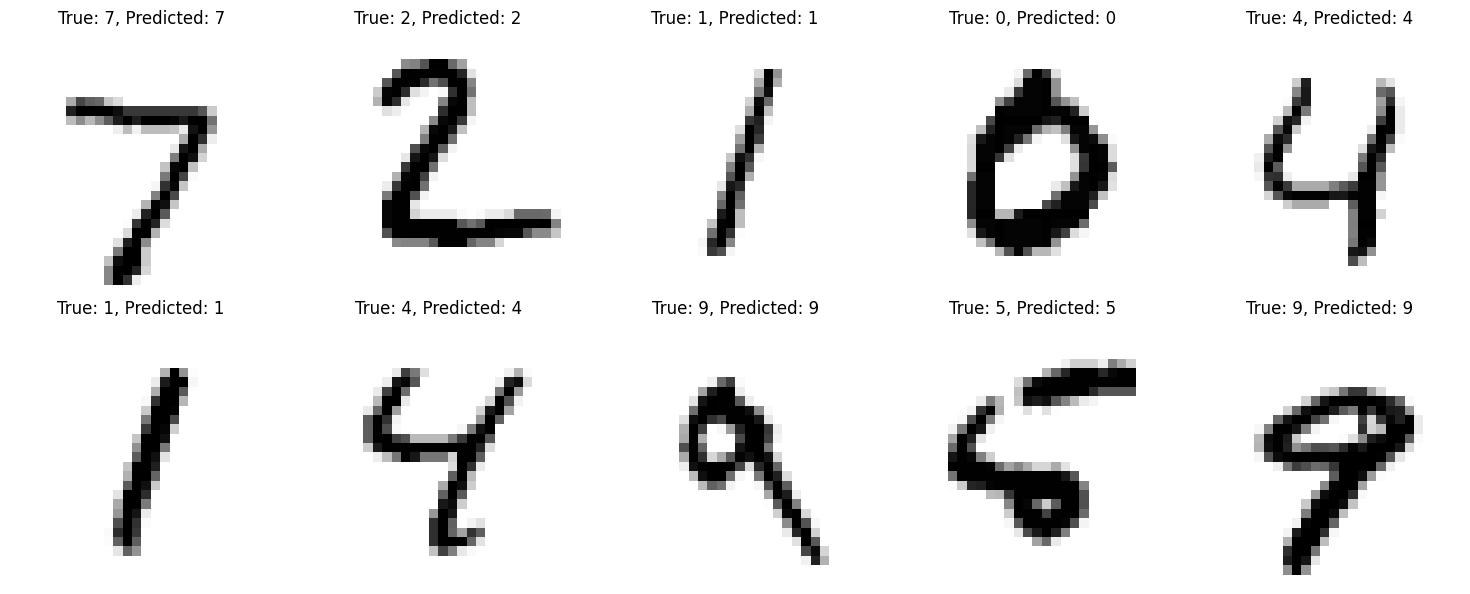

In [11]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 10
predictions = model.predict(x_test[:num_images])

plt.figure(figsize=(15, 6))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_class = np.argmax(predictions[i])
    plt.title(f"True: {y_test[i]}, Predicted: {predicted_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


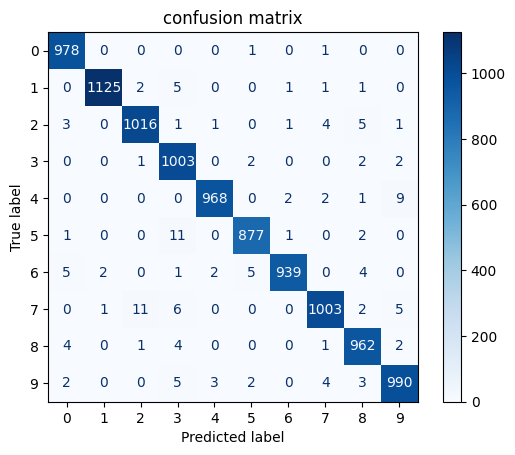

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate predictions for the entire test set
predictions = model.predict(x_test)

# Get the predicted labels as integers
y_pred = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('confusion matrix')
plt.show()

A confusion matrix evaluates the performance of a classification model. Each row represents the actual class, and each column represents the predicted class.

Breakdown:
Diagonal Cells: Correct predictions.
Example: 975 instances that were actually class '0' were correctly predicted as '0'.
Off-Diagonal Cells: Misclassifications.
Example: 2 instances that were actually class '0' were misclassified as '4'.
Examples:
Row 0: 975 instances of actual '0' were correctly predicted, 1 was misclassified as '1', 1 as '2', 1 as '3', 2 as '4'.
Row 1: 1131 instances of actual '1' were correctly predicted, 1 was misclassified as '0', 2 as '2'.
Row 2: 1017 instances of actual '2' were correctly predicted, 3 were misclassified as '0', 2 as '1', 8 as '3', 1 as '4', 2 as '5'.
Row 3: 1002 instances of actual '3' were correctly predicted, 1 was misclassified as '2', 2 as '5', 4 as '7'.
Row 4: 973 instances of actual '4' were correctly predicted, 2 were misclassified as '3', 8 as '2'.
Row 5: 880 instances of actual '5' were correctly predicted, 1 was misclassified as '3', 8 as '6'.
Row 6: 946 instances of actual '6' were correctly predicted, 2 were misclassified as '4', 4 as '5'.
Row 7: 1009 instances of actual '7' were correctly predicted, 8 were misclassified as '3', 12 as '2'.
Row 8: 953 instances of actual '8' were correctly predicted, 4 were misclassified as '2', 1 as '3'.
Row 9: 985 instances of actual '9' were correctly predicted, 4 were misclassified as '4', 3 as '5'.
The diagonal shows the number of correctly classified instances, while the off-diagonal elements show misclassifications. The model performs well overall, with most instances correctly classified.


Graph Plotting For Accuracy And Loss

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9990 - loss: 0.0027 - val_accuracy: 0.9844 - val_loss: 0.0589
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9984 - loss: 0.0043 - val_accuracy: 0.9862 - val_loss: 0.0659
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9992 - loss: 0.0024 - val_accuracy: 0.9863 - val_loss: 0.0687
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9992 - loss: 0.0021 - val_accuracy: 0.9848 - val_loss: 0.0688
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9872 - val_loss: 0.0627


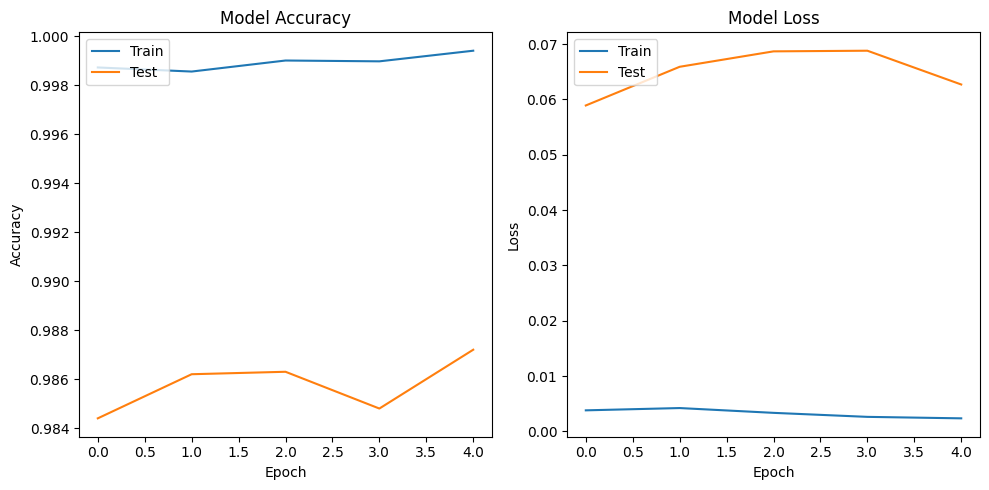

Graphs Showing Accuracy and Loss


In [13]:
import matplotlib.pyplot as plt

# Assuming you have `history` object which stores training history
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
print("Graphs Showing Accuracy and Loss")

Evaluation

In [14]:
import pandas as pd
import numpy as np

# Example: Assuming predictions and true labels are available
num_test_samples = len(y_test)
predicted_labels = np.argmax(predictions, axis=1) 

# Determine correct and incorrect predictions
correct_predictions = (predicted_labels == y_test)
incorrect_predictions = (predicted_labels!= y_test)

# Count correct and incorrect predictions
correct_count = np.sum(correct_predictions)
incorrect_count = np.sum(incorrect_predictions)

# Calculate accuracy
accuracy = correct_count / num_test_samples * 100

# Create a summary table
summary_data = {
    'Metric': ['Correct Predictions', 'Incorrect Predictions', 'Total Samples', 'Accuracy'],
    'Count': [correct_count, incorrect_count, num_test_samples, f"{accuracy:.2f}%"]
}

summary_df = pd.DataFrame(summary_data)

print("Summary of Predictions:")
print(summary_df)

Summary of Predictions:
                  Metric   Count
0    Correct Predictions    9861
1  Incorrect Predictions     139
2          Total Samples   10000
3               Accuracy  98.61%


Loading The Model

In [15]:
# Assuming you have loaded your model
from tensorflow.keras.models import load_model

model = load_model('handwritten_mnist_model.h5')

# Explicitly compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Make predictions
predictions = model.predict(x_test)

# Example: Print the first prediction
print(predictions[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.0628506e-11 1.5519430e-13 1.3547065e-08 4.8867737e-08 1.8505773e-15
 1.8229621e-10 4.9724225e-18 1.0000000e+00 1.5437057e-10 1.8085910e-08]
